In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data_csv = pd.read_csv("train.csv")

In [3]:
raw_data_csv.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
sum(raw_data_csv['label'])/len(raw_data_csv)

0.500625

In [5]:
### we can see that the ratio of fake and real news is about 50%, that is, our dataset is well balanced

In [6]:
raw_data_csv.describe(include = 'all')

,id,title,author,text,label
count,20800.000000,20242,18843,20761,20800.000000
unique,NaN,19803,4201,20386,NaN
top,NaN,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,,NaN
freq,NaN,5,243,75,NaN
mean,10399.500000,NaN,NaN,NaN,0.500625
std,6004.587135,NaN,NaN,NaN,0.500012
min,0.000000,NaN,NaN,NaN,0.000000
25%,5199.750000,NaN,NaN,NaN,0.000000
50%,10399.500000,NaN,NaN,NaN,1.000000
75%,15599.250000,NaN,NaN,NaN,1.000000


In [7]:
### there are missing values for every feature we are interested in

In [8]:
### we will build a model based on title feature, so we have to delete rows with empty title

In [9]:
data_without_mv =  raw_data_csv[raw_data_csv['title'].notna()]

In [10]:
data_without_mv.describe(include = 'all')

,id,title,author,text,label
count,20242.000000,20242,18285,20203,20242.000000
unique,NaN,19803,3838,19868,NaN
top,NaN,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,,NaN
freq,NaN,5,243,75,NaN
mean,10398.462504,NaN,NaN,NaN,0.486859
std,6001.175875,NaN,NaN,NaN,0.499840
min,0.000000,NaN,NaN,NaN,0.000000
25%,5207.250000,NaN,NaN,NaN,0.000000
50%,10403.500000,NaN,NaN,NaN,0.000000
75%,15584.750000,NaN,NaN,NaN,1.000000


In [11]:
### code for setting the indexes right

In [12]:
data_without_mv.reset_index(inplace = True)

In [13]:
data_without_mv = data_without_mv.drop(['index'], axis = 1)

In [14]:
data_without_mv.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [15]:
### we do the same thing for our test dataset

In [16]:
raw_test = pd.read_csv("test.csv")

In [17]:
raw_test.describe(include = 'all')

,id,title,author,text
count,5200.000000,5078,4697,5193
unique,NaN,5056,1732,5126
top,NaN,"Hillary is So Unpopular, She Has to Pay Off Yo...",Pam Key,
freq,NaN,2,65,31
mean,23399.500000,NaN,NaN,NaN
std,1501.255031,NaN,NaN,NaN
min,20800.000000,NaN,NaN,NaN
25%,22099.750000,NaN,NaN,NaN
50%,23399.500000,NaN,NaN,NaN
75%,24699.250000,NaN,NaN,NaN


In [18]:
test_without_mv = raw_test[raw_test['title'].notna()]

In [19]:
test_without_mv.reset_index(inplace = True)

In [20]:
test_without_mv = test_without_mv.drop(['index'], axis = 1)

In [21]:
test_without_mv.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...


In [22]:
test_without_mv.describe(include='all')

,id,title,author,text
count,5078.000000,5078,4575,5071
unique,NaN,5056,1639,5006
top,NaN,When Slaveholders Controlled the Government—An...,Pam Key,
freq,NaN,2,65,31
mean,23400.105553,NaN,NaN,NaN
std,1500.138055,NaN,NaN,NaN
min,20800.000000,NaN,NaN,NaN
25%,22100.250000,NaN,NaN,NaN
50%,23403.500000,NaN,NaN,NaN
75%,24694.750000,NaN,NaN,NaN


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
### removal of stopwords, punctuations, special characters and word stemming

In [25]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []

for i in range(0,len(data_without_mv)+len(test_without_mv)):
    if i < len(data_without_mv):
        temp = re.sub('[^a-zA-Z]', ' ',data_without_mv['title'][i])
        temp = temp.lower()
        temp = temp.split()
    else:
        temp = re.sub('[^a-zA-Z]', ' ',test_without_mv['title'][i-len(data_without_mv)])
        temp = temp.lower()
        temp = temp.split()

    temp = [ps.stem(word) for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    corpus.append(temp)

In [26]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [27]:
### Bag of Words model

In [28]:
cv = CountVectorizer(max_features = 7000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
X.shape

(25320, 7000)

In [31]:
y = data_without_mv['label']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:len(data_without_mv)], y, test_size=0.33,random_state=0)

In [33]:
cv.get_feature_names()[:20]

['aaron',
 'ab',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abedin email',
 'abl',
 'aboard',
 'abolish',
 'abort',
 'abram',
 'abroad',
 'abroad new',
 'abroad new york',
 'absolut',
 'abstain']

In [34]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 7000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [35]:
import matplotlib.pyplot as plt

In [36]:
### Confusion matrix

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
### Classification using Count Vectorizers Word Vectors

In [39]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

accuracy:  0.902
Confusion matrix, without normalization


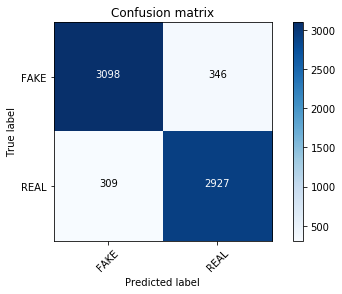

In [40]:
from sklearn import metrics
import itertools

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=["FAKE", "REAL"])


In [41]:
### model has a precision of about 90%

In [42]:
pred2 = classifier.predict(X[len(data_without_mv):])

In [43]:
pred2

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [44]:
test_without_mv['predicted label'] = pred2

In [45]:
### prediction for the test dataset

In [46]:
test_without_mv.head()

,id,title,author,text,predicted label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,1
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",0
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [47]:
test_without_mv.describe(include = 'all')

,id,title,author,text,predicted label
count,5078.000000,5078,4575,5071,5078.000000
unique,NaN,5056,1639,5006,NaN
top,NaN,When Slaveholders Controlled the Government—An...,Pam Key,,NaN
freq,NaN,2,65,31,NaN
mean,23400.105553,NaN,NaN,NaN,0.491532
std,1500.138055,NaN,NaN,NaN,0.499978
min,20800.000000,NaN,NaN,NaN,0.000000
25%,22100.250000,NaN,NaN,NaN,0.000000
50%,23403.500000,NaN,NaN,NaN,0.000000
75%,24694.750000,NaN,NaN,NaN,1.000000


In [48]:
### in our test dataset, we predicted that the amount of fake and real news is roughly about the same